# Studio di circuiti con amplificatori operazionali 

Quello che segue e' un riassunto (**informale**) dell'analisi dati per la prima esperienza di laboratorio del corso Laboratorio Di Fisica 2020/2021.
Per un report piu' dettagliato e formale, consultare la relazione.

### Materiale: 
 - integrato TL082C 
 - resistenze e condensatori di varie taglie
 - oscilloscopio-generatore di funzioni PicoScope 2204A
 - multimetro digitale
 - scheda alimentatore $\pm 12 \;V$

## Misura della curva di trasferimento VTC per un amplificatore invertente

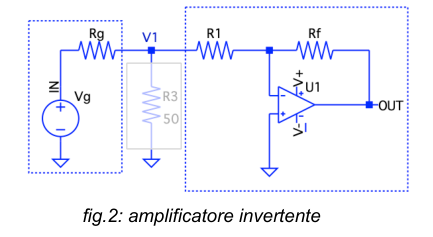

In [1]:
from IPython import display
display.Image("./circuitoAMPLINV.png")

Importo le misure di $V_{in}$ e $V_{out}$, ottenute aumentando progressivamente l'ampiezza di uscita fino alla saturazione

In [2]:
import pandas as pd
import numpy as np
data_vtc = pd.read_csv('data_vtc.csv', delimiter='\t')
data_vtc

,Vin+ mv,Vout- mv,Vin- mv,Vout+ mv,scala Vin mv,scala Vout mv
0,87.89,-729.2,-101.0,829,500,1000
1,425.50,-3800.0,-469.1,3967,500,5000
2,912.10,-7625.0,-931.1,7862,1000,10000
3,1178.00,-10120.0,-1230.0,10360,2000,20000
4,1373.00,-10830.0,-1406.0,11450,2000,20000
5,1558.00,-10830.0,-1610.0,11500,2000,20000
6,1857.00,-10830.0,-1905.0,11400,2000,20000


Calcolo gli errori associati alle misure 

$\sigma = \sqrt{(0.58 \times \Delta_{scala}\times x)^{2} + (0.58 \times \Delta_{lettura} \times digit)^{2}}$

- $\Delta_{scala}=0.03$ (dato dal costruttore)
- $\Delta_{digit} = \frac{1}{2^{8}} \times \; \text{scala}$ , dove $8$ e' la risoluzione dell'oscilloscopio
- $0.58$ e' il fattore di conversione per la distribuzione uniforme

In [3]:
vtc_cols = list(data_vtc.columns.values)
SCALA = 0.03
TRIANG = 0.58
data_vtc['errVin+'] = ( (SCALA * TRIANG * data_vtc['Vin+ mv'])**2 + (TRIANG * 2/256 * data_vtc['scala Vin mv'])**2 )**(1/2)
data_vtc['errVin-'] = ( (SCALA * TRIANG * data_vtc['Vin- mv'])**2 + (TRIANG * 2/256 * data_vtc['scala Vin mv'])**2 )**(1/2)
data_vtc['errVout+'] = ( (SCALA * TRIANG * data_vtc['Vout+ mv'])**2 + (TRIANG * 2/256 * data_vtc['scala Vout mv'])**2 )**(1/2)
data_vtc['errVout-'] = ( (SCALA * TRIANG * data_vtc['Vout- mv'])**2 + (TRIANG * 2/256 * data_vtc['scala Vout mv'])**2 )**(1/2)
data_vtc

,Vin+ mv,Vout- mv,Vin- mv,Vout+ mv,scala Vin mv,scala Vout mv,errVin+,errVin-,errVout+,errVout-
0,87.89,-729.2,-101.0,829,500,1000,2.733454,2.867318,15.119567,13.472921
1,425.50,-3800.0,-469.1,3967,500,5000,7.742598,8.470942,72.648928,69.893920
2,912.10,-7625.0,-931.1,7862,1000,10000,16.504735,16.822876,144.108065,140.199423
3,1178.00,-10120.0,-1230.0,10360,2000,20000,22.411250,23.241655,201.762237,198.040083
4,1373.00,-10830.0,-1406.0,11450,2000,20000,25.551332,26.088997,218.873213,209.101119
5,1558.00,-10830.0,-1610.0,11500,2000,20000,28.583870,29.443388,219.665429,209.101119
6,1857.00,-10830.0,-1905.0,11400,2000,20000,33.558625,34.363535,218.081591,209.101119


Prima di procedere con l'analisi dati, isolo i masssimi e i minimi, non potendo garantire la compatibilita' tra i due set a priori.

In [4]:
max_vtc = data_vtc[["Vin+ mv", "Vout+ mv", "errVin+", "errVout+"]]
min_vtc = data_vtc[["Vin- mv", "Vout- mv", "errVin-", "errVout-"]]
max_vtc


,Vin+ mv,Vout+ mv,errVin+,errVout+
0,87.89,829,2.733454,15.119567
1,425.50,3967,7.742598,72.648928
2,912.10,7862,16.504735,144.108065
3,1178.00,10360,22.411250,201.762237
4,1373.00,11450,25.551332,218.873213
5,1558.00,11500,28.583870,219.665429
6,1857.00,11400,33.558625,218.081591


In [5]:
min_vtc

,Vin- mv,Vout- mv,errVin-,errVout-
0,-101.0,-729.2,2.867318,13.472921
1,-469.1,-3800.0,8.470942,69.893920
2,-931.1,-7625.0,16.822876,140.199423
3,-1230.0,-10120.0,23.241655,198.040083
4,-1406.0,-10830.0,26.088997,209.101119
5,-1610.0,-10830.0,29.443388,209.101119
6,-1905.0,-10830.0,34.363535,209.101119


### Grafico esplorativo

Faccio un primo grafico esplorativo

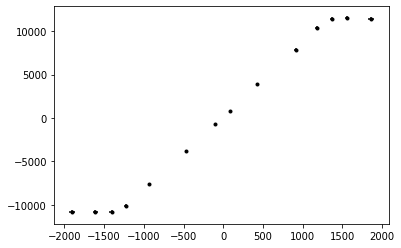

In [6]:
import matplotlib
import matplotlib.pyplot as plt


fig = plt.figure()

plt.errorbar(x=max_vtc["Vin+ mv"], y=max_vtc["Vout+ mv"],
                    color='#000000', xerr=max_vtc['errVin+'],
                   yerr=max_vtc['errVout+'], marker='.', fmt='o')

plt.errorbar(x=min_vtc["Vin- mv"], y=min_vtc["Vout- mv"],
             xerr=min_vtc['errVin-'], yerr=min_vtc['errVout-'] ,
             color='#000000', fmt='o', marker='.')
plt.show()

Reietto i dati affetti dalla saturazione dell'amplificatore

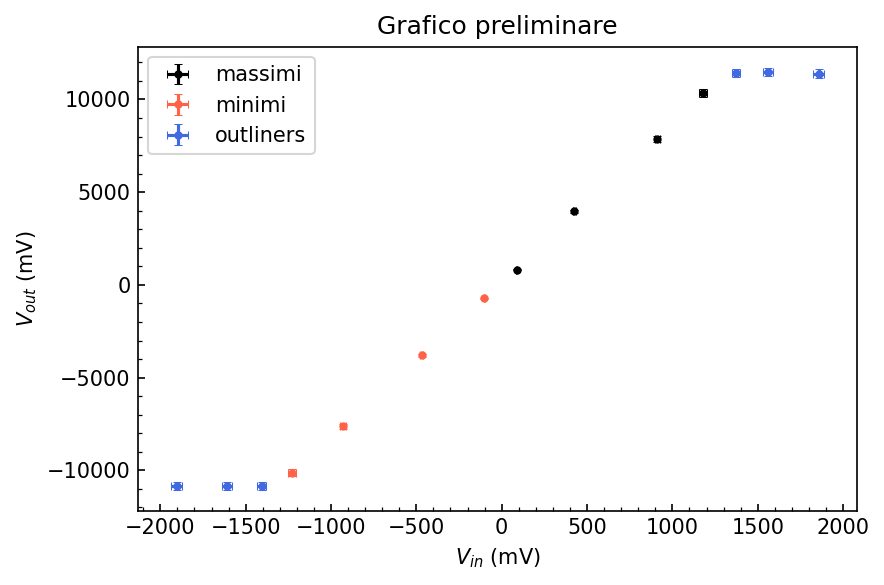

,Vin+ mv,Vout+ mv,errVin+,errVout+
0,87.89,829.0,2.733454,15.119567
1,425.50,3967.0,7.742598,72.648928
2,912.10,7862.0,16.504735,144.108065
3,1178.00,10360.0,22.411250,201.762237
4,-101.00,-729.2,2.867318,13.472921
5,-469.10,-3800.0,8.470942,69.893920
6,-931.10,-7625.0,16.822876,140.199423
7,-1230.00,-10120.0,23.241655,198.040083


In [7]:

# reietto dati 
max_vtcR = max_vtc.drop(max_vtc.index[[6,5,4]])
min_vtcR = min_vtc.drop(max_vtc.index[[6,5,4]])
reieMAX = pd.DataFrame()
reieMIN = pd.DataFrame()
reieMAX = max_vtc[max_vtc['Vin+ mv'] > 1200]
reieMIN = min_vtc[min_vtc['Vin- mv'] < -1400]
minNew = pd.DataFrame()
minNew = min_vtcR.rename(columns = {"Vout- mv": "Vout+ mv", "Vin- mv": "Vin+ mv",
                                        "errVin-":"errVin+", "errVout-":"errVout+"})

# riunisco i dati per fit esplorativo
tt = max_vtcR.append(minNew, ignore_index=True)

# fitting function
def func(x, m, q):
    return m*x+q


fig, axs = plt.subplots()

# fit esplorativo
X = tt["Vin+ mv"]
Y = tt["Vout+ mv"]
errY = tt["errVout+"]
# plot dei dati
max_vtcR.plot(x="Vin+ mv", y="Vout+ mv",
                    color='#000', xerr='errVin+',
                   yerr='errVout+', fmt='.', marker='.',
                  capsize=2, capthick=0.5, ax=axs, label='massimi')
min_vtcR.plot(x="Vin- mv", y="Vout- mv",
             xerr='errVin-', yerr='errVout-' ,
             color='tomato', fmt='.', marker='.',
            capsize=2, capthick=0.5, xlabel='$V_{in}$ (mV)',
            ax=axs, ylabel='$V_{out}$ (mV)', 
              title='Grafico preliminare', label='minimi')
reieMAX.plot(x="Vin+ mv", y="Vout+ mv",
                    color='royalblue', xerr='errVin+',
                   yerr='errVout+', fmt='.', marker='.',
                  capsize=2, capthick=0.5, ax=axs, legend=None)
reieMIN.plot(x="Vin- mv", y="Vout- mv",
             xerr='errVin-', yerr='errVout-' ,
             color='royalblue', fmt='.', marker='.', 
            capsize=2, capthick=0.5, xlabel='$V_{in}$ (mV)',
            ax=axs, ylabel='$V_{out}$ (mV)', title='Grafico preliminare',
            label='outliners')

# fit
# tt_fit,tt_cov = curve_fit(func, X,Y, sigma=errY, absolute_sigma=True)
# xfit = np.linspace(-2000,2000)
# axs.plot(xfit, func(xfit,*tt_fit), '--', color='orange')



# plot customization
axs.tick_params(axis='both', which='minor',direction='in')
axs.tick_params(axis='both', which='major',direction='in')
axs.minorticks_on()
fig.set_size_inches(6,4)
fig.set_dpi(150.0) 
fig.tight_layout()
plt.show()
fig.savefig("img/grafico_esplorativo.png", dpi=500)
# stampo i massimi 
tt

In [8]:
# stampo i minimi 
min_vtcR

,Vin- mv,Vout- mv,errVin-,errVout-
0,-101.0,-729.2,2.867318,13.472921
1,-469.1,-3800.0,8.470942,69.893920
2,-931.1,-7625.0,16.822876,140.199423
3,-1230.0,-10120.0,23.241655,198.040083


In [9]:
# stampo i massimi 
max_vtcR 

,Vin+ mv,Vout+ mv,errVin+,errVout+
0,87.89,829,2.733454,15.119567
1,425.50,3967,7.742598,72.648928
2,912.10,7862,16.504735,144.108065
3,1178.00,10360,22.411250,201.762237


### Fit singoli

Faccio un fit di entrambi i set presi singolarmente

preMax 8.796773584961587 0.11192246960820061
preMin 8.320773854327127 0.10448865635855951


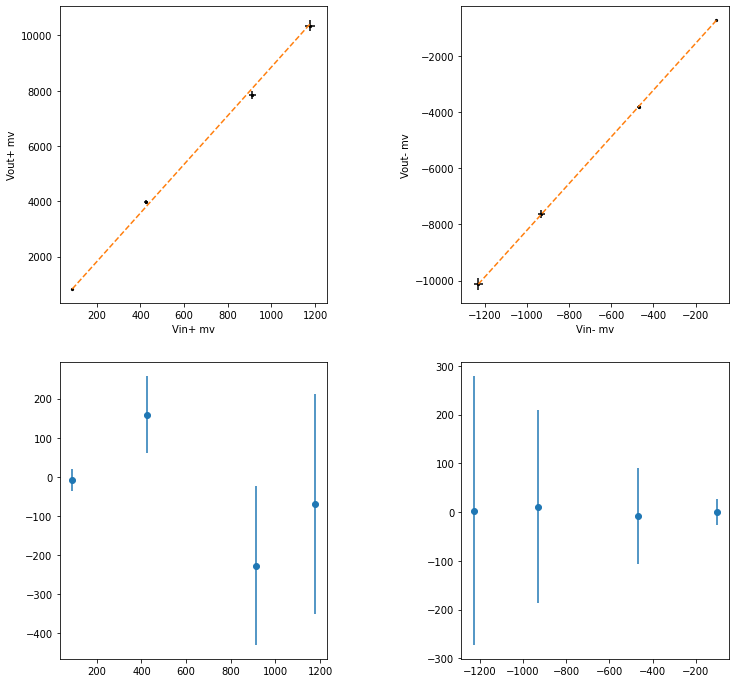

----Massimi----
 m 8.79934431608861 	 0.15939941414936673 
 q 63.5065937527479 	 34.6747259728688 
sigmaPost 202.41882190253818 chisq 3.933898080225414
----Minimi----
 m 8.320426123620381 	 0.1502457236719003 
 q 110.82434750848884 	 34.530705389535854 
sigmaPost 9.96813979082058 chisq 0.009598999240673641


In [10]:
from scipy.optimize import curve_fit

# create subplots------------------
fig, axes = plt.subplots(ncols=2, nrows=2)
fig.set_figwidth(12)
fig.set_figheight(12)

plt.subplots_adjust(wspace=0.5, hspace=0.2)
max_vtcR.plot(x="Vin+ mv", y="Vout+ mv", xerr="errVin+",
                      yerr="errVout+", ax=axes[0,0], kind='scatter',
                     marker='.', color='#000')
min_vtcR.plot(x="Vin- mv", y="Vout- mv", xerr="errVin-",
                      yerr="errVout-", ax=axes[0,1], kind='scatter',
                     marker='.', color='#000')

# fits------------------------------

# MAX
X = max_vtcR["Vin+ mv"]
Y = max_vtcR["Vout+ mv"]
errY = max_vtcR["errVout+"]

max_fit,max_cov = curve_fit(func, X,Y, sigma=errY, absolute_sigma=True)
print("preMax", max_fit[0], np.sqrt(max_cov[0][0]))
# new fit after projecting the xerrors using the old fit
errY = np.sqrt( errY**2 + max_fit[0]**2 * max_vtcR["errVin+"]**2 )
max_fit,max_cov = curve_fit(func, X,Y, sigma=errY, absolute_sigma=True)
# plot fit results
axes[0,0].plot(X, func(X,*max_fit), '--')
# plot residuals
difference =  Y  -func(X,*max_fit)   
axes[1,0].errorbar(x=X,y=difference, yerr=errY, fmt='o')
# sigma posteriori 
max_sigmaPost = np.sqrt(np.sum( difference**2)/ (len(X) - 2))
# chisq
max_chisq = np.sum( difference**2 / errY**2)

# min
X = min_vtcR["Vin- mv"]
Y = min_vtcR["Vout- mv"]
errY = min_vtcR["errVout-"]
min_fit,min_cov = curve_fit(func, X,Y, sigma=errY, absolute_sigma=True)
print("preMin", min_fit[0], np.sqrt(min_cov[0][0]))
errY = np.sqrt( errY**2 + min_fit[0]**2 * min_vtcR["errVin-"]**2 )
min_fit,min_cov = curve_fit(func, X,Y, sigma=errY, absolute_sigma=True)
axes[0,1].plot(X, func(X,*min_fit), '--')
# plot residuals
difference = Y- func(X,*min_fit) 
axes[1,1].errorbar(x=X,y=difference, yerr=errY, fmt='o')
plt.show()
# sigma posteriori 
min_sigmaPost = np.sqrt(np.sum( (func(X,*min_fit) - Y)**2)/ (len(X) - 2))
# chisq
min_chisq = np.sum( difference**2 / errY**2)

# print results---------------------
max_m = max_fit[0];
max_q = max_fit[1];
max_m_err = np.sqrt(max_cov[0][0])
max_q_err = np.sqrt(max_cov[1][1])

min_m = min_fit[0];
min_q = min_fit[1];
min_m_err = np.sqrt(min_cov[0][0])
min_q_err = np.sqrt(min_cov[1][1])

print("----Massimi----\n m", max_m, "\t", max_m_err,
      "\n q", max_q, "\t", max_q_err,
      "\nsigmaPost", max_sigmaPost, "chisq", max_chisq)
print("----Minimi----\n m", min_m, "\t", min_m_err,
      "\n q", min_q, "\t", min_q_err,
      "\nsigmaPost", min_sigmaPost, "chisq", min_chisq)


Controllo la compatibilita' tra i due fit 

In [11]:
comp_mm = abs(max_m - min_m)/np.sqrt((max_m_err)**2 + (min_m_err)**2)
# compatib con lo zero delle intercette
comp_qMax0 = max_q/max_q_err
comp_qMin0 = min_q/min_q_err

# comp tra intercette
comp_qq = abs(max_q - min_q)/np.sqrt((max_q_err)**2 + (min_q_err)**2)
print("comp m1 m2\t", comp_mm,
      "\ncomp qMax 0\t", comp_qMax0,
      "\ncomp qMin 0\t", comp_qMin0,
      "\ncomp q1 q2\t", comp_qq)

comp m1 m2	 2.1863635811047746 
comp qMax 0	 1.8314951876602734 
comp qMin 0	 3.209443486841509 
comp q1 q2	 0.966936595615962


### Fit unico 

Faccio un fit unico, nonostante i problemi di compatibilità tra i due set, solo a scopo esplorativo

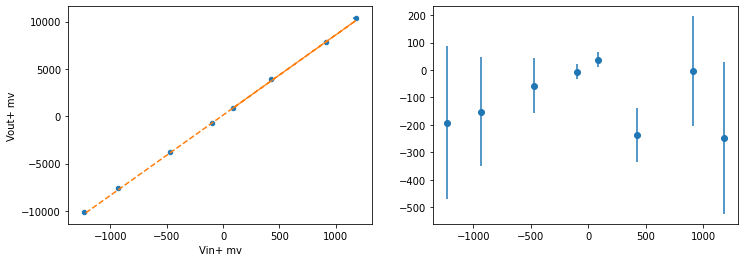

m 8.481895105937253 	 0.08325705096581874 
q 120.80112815442872 	 18.59356166884935 
sigmaPost 174.25366268436989 chisq 9.956935185342752


,Vin+ mv,Vout+ mv,errVin+,errVout+
0,87.89,829.0,2.733454,15.119567
1,425.50,3967.0,7.742598,72.648928
2,912.10,7862.0,16.504735,144.108065
3,1178.00,10360.0,22.411250,201.762237
4,-101.00,-729.2,2.867318,13.472921
5,-469.10,-3800.0,8.470942,69.893920
6,-931.10,-7625.0,16.822876,140.199423
7,-1230.00,-10120.0,23.241655,198.040083


In [12]:

fig1, axes11= plt.subplots(ncols=2)
fig1.set_figwidth(12)
fig1.set_figheight(4)

# unisco i set
min_vtcNEW = min_vtcR.rename(columns = {"Vout- mv": "Vout+ mv", "Vin- mv": "Vin+ mv",
                                        "errVin-":"errVin+", "errVout-":"errVout+"})
ytot = max_vtcR.append(min_vtcNEW, ignore_index=True)


# fit & plot
X = ytot["Vin+ mv"]
Y = ytot["Vout+ mv"]
errY = ytot["errVout+"]

tot_fit,tot_cov = curve_fit(func, X,Y, sigma=errY, absolute_sigma=True)
errY = np.sqrt( errY**2 + tot_fit[0]**2 * ytot["errVin+"]**2 )
tot_fit,tot_cov = curve_fit(func, X,Y, sigma=errY, absolute_sigma=True)
ytot.plot.scatter(x='Vin+ mv', y='Vout+ mv', xerr='errVin+', yerr='errVout+',
                       ax=axes11[0])
axes11[0].plot(X, func(X,*tot_fit), '--')

# plot residuals
difference = func(X,*tot_fit) - Y     
axes11[1].errorbar(x=X,y=difference, yerr=errY, fmt='o')
# sigma posteriori 
tot_sigmaPost = np.sqrt(np.sum( (func(X,*tot_fit) - Y)**2)/ (len(X) - 2))
# chisq
tot_chisq = np.sum( difference**2 / errY**2)

plt.show()

# stampo i risultati 
tot_m = tot_fit[0];
tot_q = tot_fit[1];
tot_m_err = np.sqrt(tot_cov[0][0])
tot_q_err = np.sqrt(tot_cov[1][1])

print("m", tot_m, "\t", tot_m_err,
      "\nq", tot_q, "\t", tot_q_err,
      "\nsigmaPost", tot_sigmaPost, "chisq", tot_chisq)
ytot

Confronto l'amplificazione attesa con quella teorica

$A_{th} = \frac{R_f}{R_1}$

In [13]:
# costanti multimetro
errScala = 0.008
errDigit = 2
# misure dirette + errori 
Rf = 67.9e3
sigmaRf = np.sqrt( (Rf*errScala*TRIANG)**2 + 
                  (errDigit*0.1e3*TRIANG)**2 )
R1 = 8.10e3
sigmaR1 = np.sqrt( (R1*errScala*TRIANG)**2 + 
                  (errDigit*0.01e3*TRIANG)**2 )
Rg = 600
Ath = Rf/R1
sigmaAth = np.sqrt( (sigmaRf/R1)**2 + (Rf/(R1)**2*sigmaR1)**2 )

AthG = Rf/(R1+Rg)
sigmaAthG = np.sqrt( (sigmaRf/(R1+Rg))**2 + (Rf/(R1+Rg)**2*sigmaR1)**2 )

Asp = tot_m
sigmaAsp = tot_m_err
compA = abs(Ath-Asp)/np.sqrt( (sigmaAth**2 + sigmaAsp)**2 )
print("Rf", Rf, sigmaRf, "\nR1", R1, sigmaR1)
print("A teorico:\t" , Ath, "\t", sigmaAth,
     "\nA sperime:\t", Asp, "\t", sigmaAsp,
     "\ncompatib: \t ", compA)
print("AthG", AthG, sigmaAthG)


Rf 67900.0 335.7324576742618 
R1 8100.0 39.3334089038822
A teorico:	 8.382716049382717 	 0.058094532151884266 
A sperime:	 8.481895105937253 	 0.08325705096581874 
compatib: 	  1.1448313234196255
AthG 7.804597701149425 0.05228986700213655


### Fit picco picco 

Provo ora a vedere se si riesce a risolvere l'incompatibilita' delle intercette max/min unendo i set, ma plottando i valori picco/picco

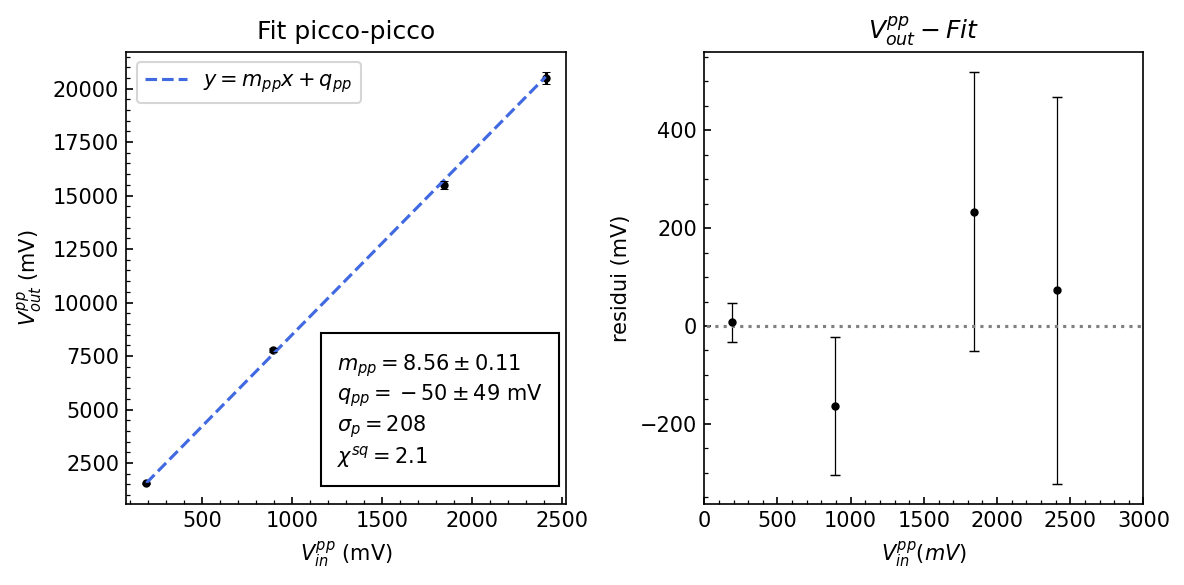

m 8.556309754720042 	 0.10946095160186048 
q -50.397403399099325 	 48.98392228480664 
 sigmaPost 207.99629472955007 chisq 2.0842596453265982


0     39.488874
1    140.740972
2    284.775673
3    395.307119
dtype: float64

In [92]:
import matplotlib.ticker as mtick

fig, axes = plt.subplots(ncols=2)
fig.set_figwidth(8)
fig.set_figheight(4)
fig.set_dpi(150.0)
vtc_pp = pd.DataFrame()
vtc_pp['Vout_pp'] = max_vtcR['Vout+ mv'] - min_vtcR['Vout- mv']
vtc_pp['Vin_pp'] = max_vtcR['Vin+ mv'] - min_vtcR['Vin- mv']
vtc_pp['Err_Vout_pp'] = np.sqrt(
    max_vtcR['errVout+']**2 + min_vtcR['errVout-']**2)
vtc_pp['Err_Vin_pp'] = np.sqrt(max_vtcR['errVin+']**2 + min_vtcR['errVin-']**2)

X = vtc_pp["Vin_pp"]
Y = vtc_pp["Vout_pp"]
errY = vtc_pp["Err_Vout_pp"]

# fit
pp_fit, pp_cov = curve_fit(func, X, Y, sigma=errY, absolute_sigma=True)
errY = np.sqrt(errY**2 + pp_fit[0]**2 * vtc_pp["Err_Vin_pp"]**2)
pp_fit, pp_cov = curve_fit(func, X, Y, sigma=errY, absolute_sigma=True)

# plot
pll = axes[0].plot(X, func(X, *pp_fit), '--', color='royalblue',
                   label='$y = m_{pp} x + q_{pp}$')

ax2 = vtc_pp.plot(x='Vin_pp', y='Vout_pp',
                  yerr='Err_Vout_pp', ax=axes[0],
                  title='Fit picco-picco', color='black',
                  xlabel='$V_{in}^{pp}$ (mV)', ylabel='$V_{out}^{pp}$ (mV)',
                  fmt='.', marker='.', capsize=2, capthick=0.5, barsabove=True)
axes[0].legend(handles=pll)


# plot residuals
difference = func(X, *pp_fit) - Y
axes[1].errorbar(x=X, y=difference, yerr=errY, fmt='.', marker='.', capsize=2.5,
                 capthick=0.7, color='black', elinewidth=0.6)
axes[1].set_xlim(0,3000)
axes[1].plot(np.linspace(-100,3000), np.linspace(0,0), ':', color='gray')

# axes[0].ticklabel_format(axis='both',style='scientific',scilimits=(-2,2))
# axes[0].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))

# sigma posteriori
pp_sigmaPost = np.sqrt(np.sum((func(X, *pp_fit) - Y)**2) / (len(X) - 2))
# chisq
pp_chisq = np.sum(difference**2 / errY**2)

axes[1].set_xlabel('$V_{in}^{pp} (mV)$')
axes[1].set_ylabel('residui (mV)')
axes[1].set_title('$V_{out}^{pp} - Fit$ ')

# plot customization
axes[0].tick_params(axis='both', which='minor', direction='in')
axes[0].tick_params(axis='both', which='major', direction='in')
axes[0].minorticks_on()
axes[1].tick_params(axis='both', which='minor', direction='in')
axes[1].tick_params(axis='both', which='major', direction='in')
axes[1].minorticks_on()

axes[0].text(1250, 2500, '$m_{pp}=8.56\pm 0.11 $'
                         '\n$q_{pp}= -50 \pm 49$ mV'
                         '\n$\sigma_p=208$'
                         '\n$\chi^{sq}=2.1$', color='black', 
        bbox=dict(facecolor='none', edgecolor='black', pad=8.0))

fig.tight_layout()
fig.savefig("img/grafico_pp.png", dpi=500)
plt.show()

# stampo i risultati
pp_m = pp_fit[0]
pp_q = pp_fit[1]
pp_m_err = np.sqrt(pp_cov[0][0])
pp_q_err = np.sqrt(pp_cov[1][1])

print("m", pp_m, "\t", pp_m_err,
      "\nq", pp_q, "\t", pp_q_err,
      "\n sigmaPost", pp_sigmaPost, "chisq", pp_chisq)
errY

### Grafico riassuntivo 

Verifico le compatibilià dei guadagni ottenuti 

In [15]:
Asp = pp_m
sigmaAsp = pp_m_err
compA = abs(Ath-Asp)/np.sqrt( (sigmaAth**2 + sigmaAsp)**2 )
compAg = abs(AthG-Asp)/np.sqrt( (sigmaAthG**2 + sigmaAsp)**2 )
print("A teorico:\t" , Ath, "\t", sigmaAth,
     "\nA sperime:\t", Asp, "\t", sigmaAsp,
     "\ncompatib: \t ", compA,
     "\n Ag teo\t", AthG, "\t", sigmaAthG,
     "\n comp Ag\t",compAg )


A teorico:	 8.382716049382717 	 0.058094532151884266 
A sperime:	 8.556309754720042 	 0.10946095160186048 
compatib: 	  1.538461295787252 
 Ag teo	 7.804597701149425 	 0.05228986700213655 
 comp Ag	 6.700038642994331


,value,Err
0,8.799344,0.159399
1,8.320426,0.150246
2,8.556310,0.109461
3,8.545740,0.109333
4,8.382716,0.058095


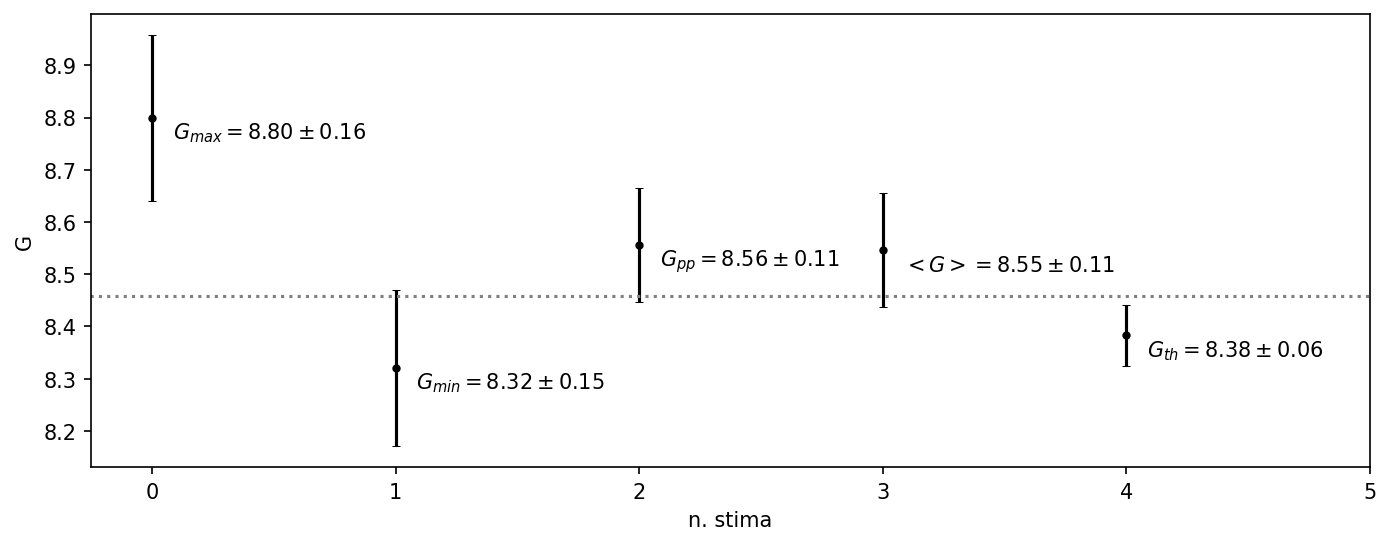

In [202]:
App = pp_m
Atot = tot_m
Amax = max_m
Amin = min_m

App_err = pp_m_err
Atot_err = tot_m_err
Amax_err = max_m_err
Amin_err = min_m_err
Ath_err = sigmaAth


def weighted_avg_and_std(values, weights):
    """
    Return the weighted average and standard deviation.

    values, weights -- Numpy ndarrays with the same shape.
    """
    average = np.average(values, weights=weights)
    # Fast and numerically precise:
    variance = np.average((values-average)**2, weights=weights)
    return (average, np.sqrt(variance))


A_set = np.array([Amax, Amin])
A_set_err = np.array([Amax_err, Amin_err])

Awavg, Awavg_err = np.average(A_set, weights=1/(A_set_err)**2, returned=True)
Awavg_err = np.sqrt(1/Awavg_err)
A_set = np.append(A_set, App)
A_set_err = np.append(A_set_err, App_err)
A_set = np.append(A_set, Awavg)
A_set_err = np.append(A_set_err, Awavg_err)
A_set = np.append(A_set, Ath)
A_set_err = np.append(A_set_err, Ath_err)
# pandaA = pd.DataFrame(data = A_set, index = ['$A_{pp}$',
#                                             '$A_{max}$', '$A_{min}$',
#                                             '$<A>$', '$A_{th}$'],
#                      columns =['Value'])
pandaA = pd.DataFrame()
pandaA['value']=A_set
pandaA['Err'] = A_set_err
# grafDef=pandaA.reset_index().plot(x='index',y = 'Value', yerr = 'Err',
#                              fmt='.', marker='.', capsize=2, capthick=0.5, barsabove=True,color='black',
#                                 legend=None)
grafDef = pandaA.plot( y='value', yerr='Err',
                      fmt='.', marker='.', capsize=2, capthick=0.5, barsabove=True,
                      color='black', legend=None, xlabel="n. stima", ylabel='G', xlim=(-0.25,5) )
fig = grafDef.get_figure()
fig.set_figwidth(11)
fig.set_figheight(4)
fig.set_dpi(150.0)
fig.savefig("img/grafico_all.png", dpi=500)
lbl= ['$G_{max} = 8.80\pm 0.16$', '$G_{min}=8.32\pm 0.15$','$G_{pp} = 8.56 \pm 0.11$',
      '$<G>=8.55\pm 0.11 $','$G_{th}=8.38\pm 0.06$']
for i, txt in enumerate(lbl):
    grafDef.annotate(txt, (i, pandaA['value'][i]),textcoords='offset points',
                    xytext=(10,-10))
Afin, Afin_err = np.average(A_set, weights=1/(A_set_err)**2, returned=True)  
grafDef.plot(np.linspace(-1,5),np.linspace(Afin,Afin), ':', color='gray')
fig.savefig("img/grafico_all.png", dpi=300)
pandaA

**Circuito derivatore**

Carico i dati con Pandas e faccio un primo plot, dopo aver calcolato gli errori secondo la formula:


$$\sigma_A = A \sqrt{ \left( 
    \frac{\sigma_L \; V_{in}/div}{V_{in}} \right)+ 
    \left( \frac{\sigma_L \; V_{out}/div}{V_{out}} \right)
    }
   $$

,f,vin,scala,vout,scala.1,H,A,errH,errA
0,100,973.5,2000,91.66,500,0.094155,-20.523122,0.002487,0.528252
1,165,973.5,2000,151.10,500,0.155213,-16.181430,0.002739,0.352980
2,270,973.5,2000,243.40,500,0.250026,-12.040308,0.003291,0.263290
3,440,973.5,2000,393.80,500,0.404520,-7.861205,0.004427,0.218871
4,720,973.5,2000,630.80,1000,0.647971,-3.768885,0.007619,0.235169
5,1180,973.5,2000,1019.00,2000,1.046739,0.396765,0.013476,0.257492
6,1930,973.5,2000,1631.00,2000,1.675398,4.482360,0.018164,0.216827
7,3160,963.3,2000,2573.00,5000,2.671027,8.533565,0.034418,0.257714
8,5180,953.2,2000,3875.00,5000,4.065254,12.181753,0.045374,0.223228
9,8480,948.2,2000,5322.00,10000,5.612740,14.983498,0.071843,0.255999


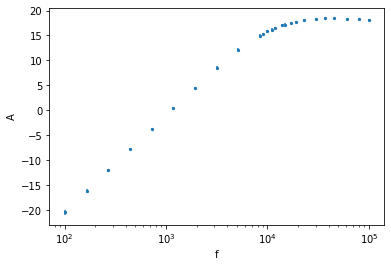

In [17]:
# read data
data_bode = pd.read_csv("bode.cvs", delimiter="\t")
data_bode['H'] = data_bode['vout']/data_bode['vin']
data_bode['A'] = 20*np.log10(data_bode['vout']/data_bode['vin'])

# compute errors
sigmaL = 2/256*TRIANG
data_bode['errH'] = data_bode['H']*np.sqrt(
    (sigmaL*data_bode['scala.1']/data_bode['vout'])**2 + 
    (sigmaL*data_bode['scala']/data_bode['vin'])**2)
data_bode['errA'] = 20*data_bode['errH']/data_bode['H']
pl = data_bode.plot(x='f', y='A', yerr='errA',kind='scatter', logx=True, marker='.')
data_bode

Carico i dati della simulazione LTSpice

<AxesSubplot:xlabel='Freq.', ylabel='A'>

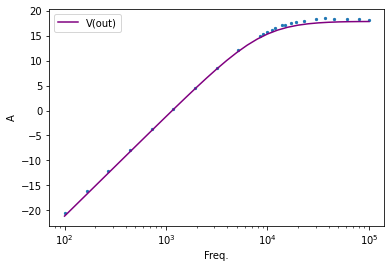

In [18]:
data_LT = pd.read_csv("LTbode.txt", delimiter='\t')
pl = data_bode.plot(x='f', y='A', kind='scatter', logx=True, marker='.')
data_LT.plot(x='Freq.', y='V(out)', kind='line', logx=True, marker='', ax=pl, style='purple')

Carico i dati di una nuova simulazione, questa volta considerando la resistenza del generatore come trascurabile $ R_g ~ 50 \; Ohm$

<AxesSubplot:xlabel='Freq.', ylabel='A'>

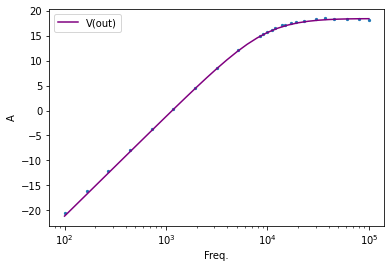

In [19]:
data_LT = pd.read_csv("LTbodeR50.txt", delimiter='\t')
pl = data_bode.plot(x='f', y='A', kind='scatter', logx=True, marker='.')
data_LT.plot(x='Freq.', y='V(out)', kind='line', logx=True, marker='', ax=pl, style='purple')

Interpolo le parti lineari e paraboliche del grafico di Bode

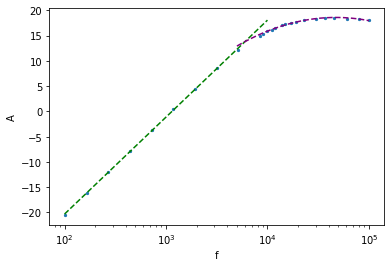

In [20]:
#fig = plt.figure()
bode_lin = pd.DataFrame()
bode_lin['A'] = data_bode['A'][data_bode['A']<14]
bode_lin['f'] = data_bode['f'][data_bode['A']<14]
bode_par = pd.DataFrame()
bode_par['A'] = data_bode['A'][data_bode['A']>15]
bode_par['f'] = data_bode['f'][data_bode['A']>15]
def flin(x,m,q):
    return m*x+q
def fpar(x,a,b,c):
    return a*x**2 + b*x + c
a = data_bode.plot(x='f', y='A', kind='scatter', marker='.')
#plt.plot(data_bode['f'], data_bode['A'])
linPar, linCov = curve_fit(flin, np.log10(bode_lin['f']), bode_lin['A'])
parPar, parCov = curve_fit(fpar, np.log10(bode_par['f']), bode_par['A'])
# xs = np.logspace(2, 4, base=10.0)
xl = np.arange(100,10000,1)
xl1 = np.arange(5000, 100000,1)
plt.plot(xl,flin(np.log10(xl),linPar[0], linPar[1]), 'g--')
plt.plot(xl1,fpar(np.log10(xl1),parPar[0], parPar[1], parPar[2]), '--', color='purple')
plt.xscale('log')
plt.show()

Stimo la frequenza di taglio:
- trovo max parabola $H_{max}$
- trovo x retta corrispondente
    $f_t = \frac{H_{max} - q}{m}$

In [21]:
a = parPar[0]
b = parPar[1]
c = parPar[2]
xmax = (-b/(2*a))
Hmax =(fpar(xmax,a,b,c))
ftB = (Hmax-linPar[1])/linPar[0]
print(ftB)
print(10**ftB)
print(linPar[0])

4.027941921143439
10664.534932582541
19.1786200529894


**Stima di $f_t$ in scala lineare**


Fit lineare attorno alla frequenza di taglio.
Inizio individuando la regione di dati per il fit

,f,H,errH
9,8480,5.612740,0.071843
18,10000,6.188639,0.077280
19,12000,6.693609,0.081600
20,9000,5.821831,0.073845
23,11000,6.432328,0.079245


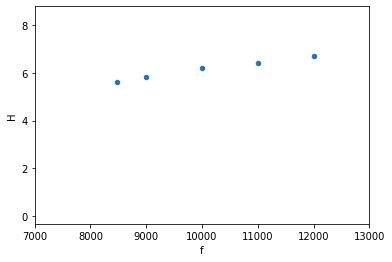

In [22]:
data_bode.plot(x='f', y='H', kind="scatter", xlim=(7000,13000))
scl = pd.DataFrame()
scl['f'] = data_bode['f'][data_bode['f']> 7000][data_bode['f'] < 13000]
scl['H'] = data_bode['H'][data_bode['f']> 7000][data_bode['f'] < 13000]
scl['errH'] = data_bode['errH'][data_bode['f']> 7000][data_bode['f'] < 13000]
scl

9612.691402921964


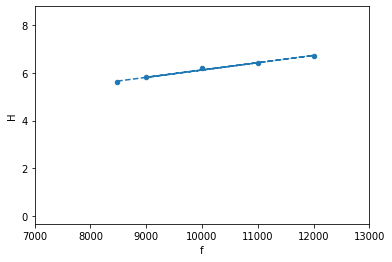

In [23]:
sclPar, sclCov = curve_fit(flin, scl['f'], scl['H'], sigma=scl['errH'], absolute_sigma=True)
m = sclPar[0]
q = sclPar[1]
ft = (10**(Hmax/20) - q*np.sqrt(2))/(m*np.sqrt(2))
print(ft)
ax1 = data_bode.plot(x='f', y='H', kind="scatter", xlim=(7000,13000))
ax1.plot(scl['f'], flin(scl['f'], *sclPar), '--')

### Circuito sommatore invertente

In [24]:
sum_data = pd.read_csv('data_sum.txt', delimiter='\t')
sum_data

,Vin,scalaVin,Vin2,scalaVin2,Vout,scalaVout
0,1.848,2,5.095,10,-6.941,10
1,-1.838,2,5.095,10,-3.249,10
2,0.000,2,5.095,10,-5.070,10


Calcolo gli errori e elimino le colonne riguardanti le scale

In [25]:
sum_data['errVin'] = np.sqrt( (2/256*TRIANG*sum_data['scalaVin'])**2 +
                            (sum_data['Vin']*TRIANG*0.03)**2)
sum_data = sum_data.drop(['scalaVin'], axis=1)
sum_data['errVin2'] = np.sqrt( (2/256*TRIANG*sum_data['scalaVin2'])**2 +
                            (sum_data['Vin2']*TRIANG*0.03)**2)
sum_data = sum_data.drop(['scalaVin2'], axis=1)
sum_data['errVout'] = np.sqrt( (2/256*TRIANG*sum_data['scalaVout'])**2 +
                            (sum_data['Vout']*TRIANG*0.03)**2)
sum_data = sum_data.drop(['scalaVout'], axis=1)
sum_data

,Vin,Vin2,Vout,errVin,errVin2,errVout
0,1.848,5.095,-6.941,0.033408,0.099562,0.128994
1,-1.838,5.095,-3.249,0.033240,0.099562,0.072451
2,0.000,5.095,-5.070,0.009062,0.099562,0.099175


Calocolo i valori di Vout attesi 

In [26]:
sum_data['VoutTH'] = -(sum_data['Vin'] + sum_data['Vin2'])
sum_data['errVoutTH'] = np.sqrt(sum_data['errVin']**2 + 
                                sum_data['errVin2']**2)
sum_data

,Vin,Vin2,Vout,errVin,errVin2,errVout,VoutTH,errVoutTH
0,1.848,5.095,-6.941,0.033408,0.099562,0.128994,-6.943,0.105017
1,-1.838,5.095,-3.249,0.033240,0.099562,0.072451,-3.257,0.104964
2,0.000,5.095,-5.070,0.009062,0.099562,0.099175,-5.095,0.099974


Controllo la compatibilita' coi valori sperimentali

In [27]:
sum_data['lambda'] = abs( sum_data['VoutTH'] - sum_data['Vout'] 
                        )/ np.sqrt(sum_data['errVout']**2 
                            + sum_data['errVoutTH'] )
sum_data

,Vin,Vin2,Vout,errVin,errVin2,errVout,VoutTH,errVoutTH,lambda
0,1.848,5.095,-6.941,0.033408,0.099562,0.128994,-6.943,0.105017,0.005734
1,-1.838,5.095,-3.249,0.033240,0.099562,0.072451,-3.257,0.104964,0.024098
2,0.000,5.095,-5.070,0.009062,0.099562,0.099175,-5.095,0.099974,0.075443


# TODO: istogramma